# Pandas DataFrames: Your Data Analysis Workhorse

Welcome to DataFrames - where pandas really earns its place as the king of data analysis. If a Series is a single column of data, a **DataFrame is a table** - rows and columns working together.

**Key insight**: A DataFrame is a collection of Series sharing the same index. Each column is a Series!

In this lesson, we'll cover:
- Creating and inspecting DataFrames
- Indexing in two dimensions (rows AND columns)
- Filtering, sorting, and grouping data
- Joining multiple DataFrames
- Real-world data manipulation patterns

This is the foundation of every data analysis pipeline you'll build. Let's get started!

## Setup: Imports and Data

We'll use real market data to make this practical and engaging:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(f"Pandas {pd.__version__}")

Pandas 2.3.3


## Creating a DataFrame: Multiple Ways

Just like Series, DataFrames can be created from different data structures. Let's see the most common patterns:

### Method 1: From a Dictionary of Lists

This is the most intuitive - each key becomes a column name, each list becomes that column's data:

In [2]:
# Create stock data
stocks_dict = {
    'ticker': ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'BRK-B'],
    'price': [178.02, 374.23, 139.64, 147.92, 495.22, 478.42, 251.05, 411.50],
    'market_cap': [2_785, 2_780, 1_750, 1_529, 1_218, 1_212, 798, 896],  # in billions
    'sector': ['Tech', 'Tech', 'Tech', 'Consumer', 'Tech', 'Tech', 'Auto', 'Financial'],
    'pe_ratio': [29.2, 36.1, 26.3, 58.7, 71.2, 28.9, 76.3, 9.1]
}

df = pd.DataFrame(stocks_dict)
df

,ticker,price,market_cap,sector,pe_ratio
0,AAPL,178.02,2785,Tech,29.2
1,MSFT,374.23,2780,Tech,36.1
2,GOOGL,139.64,1750,Tech,26.3
3,AMZN,147.92,1529,Consumer,58.7
4,NVDA,495.22,1218,Tech,71.2
5,META,478.42,1212,Tech,28.9
6,TSLA,251.05,798,Auto,76.3
7,BRK-B,411.50,896,Financial,9.1


**Notice**: 
- Each column has a name (ticker, price, etc.)
- Each row has an index (0, 1, 2...)
- Different columns can have different data types

This is your first DataFrame! Let's explore it.

### Method 2: From a List of Dictionaries

Each dictionary represents a row:

In [3]:
# Same data, different structure
stocks_list = [
    {'ticker': 'AAPL', 'price': 178.02, 'market_cap': 2785, 'sector': 'Tech', 'pe_ratio': 29.2},
    {'ticker': 'MSFT', 'price': 374.23, 'market_cap': 2780, 'sector': 'Tech', 'pe_ratio': 36.1},
    {'ticker': 'GOOGL', 'price': 139.64, 'market_cap': 1750, 'sector': 'Tech', 'pe_ratio': 26.3},
]

df_alt = pd.DataFrame(stocks_list)
df_alt

,ticker,price,market_cap,sector,pe_ratio
0,AAPL,178.02,2785,Tech,29.2
1,MSFT,374.23,2780,Tech,36.1
2,GOOGL,139.64,1750,Tech,26.3


### Method 3: From Multiple Series

Remember: DataFrames are collections of Series!

In [4]:
# Create individual Series
tickers = pd.Series(['AAPL', 'MSFT', 'GOOGL'], name='ticker')
prices = pd.Series([178.02, 374.23, 139.64], name='price')

# Combine into DataFrame
df_from_series = pd.concat([tickers, prices], axis=1)
df_from_series

,ticker,price
0,AAPL,178.02
1,MSFT,374.23
2,GOOGL,139.64


## Understanding Your DataFrame

Before analyzing data, you need to understand what you have. Pandas gives you powerful inspection tools:

### Basic Properties

In [5]:
# Dimensions: (rows, columns)
print(f"Shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Shape: (8, 5)
Rows: 8, Columns: 5


In [6]:
# Total number of elements
print(f"Total elements: {df.size}")
print(f"Verification: {df.shape[0]} × {df.shape[1]} = {df.shape[0] * df.shape[1]}")

Total elements: 40
Verification: 8 × 5 = 40


In [7]:
# Column names
print("Columns:", df.columns.tolist())

Columns: ['ticker', 'price', 'market_cap', 'sector', 'pe_ratio']


In [8]:
# Row index
print("Index:", df.index.tolist())

Index: [0, 1, 2, 3, 4, 5, 6, 7]


### Previewing Data

You'll use these constantly:

In [9]:
# First 5 rows (default)
df.head()

,ticker,price,market_cap,sector,pe_ratio
0,AAPL,178.02,2785,Tech,29.2
1,MSFT,374.23,2780,Tech,36.1
2,GOOGL,139.64,1750,Tech,26.3
3,AMZN,147.92,1529,Consumer,58.7
4,NVDA,495.22,1218,Tech,71.2


In [12]:
# First 3 rows
df.head(3)

,ticker,price,market_cap,sector,pe_ratio
0,AAPL,178.02,2785,Tech,29.2
1,MSFT,374.23,2780,Tech,36.1
2,GOOGL,139.64,1750,Tech,26.3


In [13]:
# Last 3 rows
df.tail(3)

,ticker,price,market_cap,sector,pe_ratio
5,META,478.42,1212,Tech,28.9
6,TSLA,251.05,798,Auto,76.3
7,BRK-B,411.50,896,Financial,9.1


### Schema and Types

In [14]:
# Comprehensive overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ticker      8 non-null      object 
 1   price       8 non-null      float64
 2   market_cap  8 non-null      int64  
 3   sector      8 non-null      object 
 4   pe_ratio    8 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 452.0+ bytes


In [15]:
# Just the data types
df.dtypes

ticker         object
price         float64
market_cap      int64
sector         object
pe_ratio      float64
dtype: object

### Statistical Summary

Get descriptive statistics for all numeric columns:

In [16]:
df.describe()

,price,market_cap,pe_ratio
count,8.00000,8.000000,8.000000
mean,309.50000,1621.000000,41.975000
std,147.97865,779.736769,23.926002
min,139.64000,798.000000,9.100000
25%,170.49500,1133.000000,28.250000
50%,312.64000,1373.500000,32.650000
75%,428.23000,2007.500000,61.825000
max,495.22000,2785.000000,76.300000


**What you're seeing**:
- `count`: Number of non-null values
- `mean`, `std`: Mean and standard deviation
- `min`, `max`: Range of values
- `25%`, `50%`, `75%`: Quartiles (50% is the median)

This is your first checkpoint when loading new data!

## DataFrame Indexing: Two Dimensions

Here's where DataFrames get interesting. You now have **two axes** to work with:
- **Axis 0**: Rows (up and down)
- **Axis 1**: Columns (left and right)

Let's master both!

### Selecting Columns

The default `[]` operator works on columns:

**How it works**: When you write `df["column_name"]`, pandas:
1. Looks up the column name in the DataFrame's column index
2. Returns that entire column as a Series
3. The Series inherits the DataFrame's row index

This is **not** a copy - it's a view of the original data (usually).

In [17]:
# Get a single column (returns a Series)
prices = df['price']
print(f"Type: {type(prices)}")
print(f"Shape: {prices.shape}  # One-dimensional")
print(f"Index: {prices.index.tolist()[:3]}...  # Same as DataFrame's index")
print()
prices.head()

Type: <class 'pandas.core.series.Series'>
Shape: (8,)  # One-dimensional
Index: [0, 1, 2]...  # Same as DataFrame's index



0    178.02
1    374.23
2    139.64
3    147.92
4    495.22
Name: price, dtype: float64

In [18]:
# Get multiple columns (returns a DataFrame)
# Note the DOUBLE brackets - outer for indexing, inner is a list
subset = df[ ['ticker', 'price', 'sector'] ]
print(f"Type: {type(subset)}")
print(f"Shape: {subset.shape}  # Two-dimensional: (rows, cols)")
print()
subset.head()

Type: <class 'pandas.core.frame.DataFrame'>
Shape: (8, 3)  # Two-dimensional: (rows, cols)



,ticker,price,sector
0,AAPL,178.02,Tech
1,MSFT,374.23,Tech
2,GOOGL,139.64,Tech
3,AMZN,147.92,Consumer
4,NVDA,495.22,Tech


### Dot Notation (Convenient but Limited)

For column names that are valid Python identifiers:

In [19]:
# This works
print(df.ticker.head())
print()
print(df.price.head())

0     AAPL
1     MSFT
2    GOOGL
3     AMZN
4     NVDA
Name: ticker, dtype: object

0    178.02
1    374.23
2    139.64
3    147.92
4    495.22
Name: price, dtype: float64


**Warning**: Dot notation doesn't work if:
- Column name has spaces (`df['market cap']` vs `df.market cap` ❌)
- Column name starts with a number (`df['2024']` vs `df.2024` ❌)
- Column name conflicts with DataFrame methods (`df['count']` vs `df.count` ❌)

**Best practice**: Use `[]` for reliability, especially in production code.

### Selecting Rows

Row access requires `.loc[]` (label-based) or `.iloc[]` (position-based):

In [20]:
# First row by position (returns a Series)
first_row = df.iloc[0]
print(type(first_row))
first_row

<class 'pandas.core.series.Series'>


ticker          AAPL
price         178.02
market_cap      2785
sector          Tech
pe_ratio        29.2
Name: 0, dtype: object

In [21]:
# First 3 rows by position (returns a DataFrame)
first_three = df.iloc[0:3]
print(type(first_three))
first_three

<class 'pandas.core.frame.DataFrame'>


,ticker,price,market_cap,sector,pe_ratio
0,AAPL,178.02,2785,Tech,29.2
1,MSFT,374.23,2780,Tech,36.1
2,GOOGL,139.64,1750,Tech,26.3


In [ ]:
# Select specific rows
df.iloc[ [0, 2, 5] ]

,ticker,price,market_cap,sector,pe_ratio
0,AAPL,178.02,2785,Tech,29.2
2,GOOGL,139.64,1750,Tech,26.3
5,META,478.42,1212,Tech,28.9


### Important: `.loc[]` vs `.iloc[]` with Default Index

**This is a common source of confusion!** Let's see `.loc[]` in action with our default integer index:

In [23]:
# Using .loc[] with the default integer index
# This LOOKS like position-based access, but it's not!
df.loc[0]  # This accesses index label 0

ticker          AAPL
price         178.02
market_cap      2785
sector          Tech
pe_ratio        29.2
Name: 0, dtype: object

In [24]:
# Multiple rows by index label
df.loc[[0, 2, 5]]

,ticker,price,market_cap,sector,pe_ratio
0,AAPL,178.02,2785,Tech,29.2
2,GOOGL,139.64,1750,Tech,26.3
5,META,478.42,1212,Tech,28.9


**Why does `.loc[0]` look the same as `.iloc[0]`?**

Because the **default index** is sequential integers (0, 1, 2...). So:
- `.loc[0]` means "find the row with index label 0"
- `.iloc[0]` means "find the row at position 0"

They happen to be the same row... until you sort or set a custom index!

**The trap:** After sorting or filtering, the index labels stay with their rows, but positions change. Let's see this:

In [25]:
# Sort by price (descending)
df_sorted = df.sort_values('price', ascending=False)
print("After sorting by price:")
print(df_sorted[['ticker', 'price']].head())
print("\nNotice the index column on the left - it's NOT 0, 1, 2...")

After sorting by price:
  ticker   price
4   NVDA  495.22
5   META  478.42
7  BRK-B  411.50
1   MSFT  374.23
6   TSLA  251.05

Notice the index column on the left - it's NOT 0, 1, 2...


In [26]:
# Now watch the difference!
print("Using .loc[0] (index label 0):")
print(df_sorted.loc[0])  # Still gets the original row 0 (AAPL)
print("\nUsing .iloc[0] (position 0):")
print(df_sorted.iloc[0])  # Gets the FIRST row after sorting (NVDA)

Using .loc[0] (index label 0):
ticker          AAPL
price         178.02
market_cap      2785
sector          Tech
pe_ratio        29.2
Name: 0, dtype: object

Using .iloc[0] (position 0):
ticker          NVDA
price         495.22
market_cap      1218
sector          Tech
pe_ratio        71.2
Name: 4, dtype: object


**Key Takeaway**:
- `.loc[]` always uses the **index labels** (left column)
- `.iloc[]` always uses the **positions** (0, 1, 2... regardless of index)
- With default integer index, they look the same but aren't!
- After sorting/filtering, the difference becomes obvious

**Best practice**: Use `.iloc[]` when you want "the first/last/nth row" and `.loc[]` when you know the index label.

### Using Custom Indices

Let's set the ticker as the index (like we did with Series):

In [27]:
# Set ticker as index
df_indexed = df.set_index('ticker')
df_indexed

,price,market_cap,sector,pe_ratio
ticker,,,,
AAPL,178.02,2785,Tech,29.2
MSFT,374.23,2780,Tech,36.1
GOOGL,139.64,1750,Tech,26.3
AMZN,147.92,1529,Consumer,58.7
NVDA,495.22,1218,Tech,71.2
META,478.42,1212,Tech,28.9
TSLA,251.05,798,Auto,76.3
BRK-B,411.50,896,Financial,9.1


In [28]:
# Now we can use .loc[] with ticker names
print("Apple data:")
print(df_indexed.loc['AAPL'])
print()
print("NVIDIA data:")
print(df_indexed.loc['NVDA'])

Apple data:
price         178.02
market_cap      2785
sector          Tech
pe_ratio        29.2
Name: AAPL, dtype: object

NVIDIA data:
price         495.22
market_cap      1218
sector          Tech
pe_ratio        71.2
Name: NVDA, dtype: object


In [30]:
# Multiple rows by label
df_indexed.loc[['AAPL', 'MSFT', 'GOOGL']]

,price,market_cap,sector,pe_ratio
ticker,,,,
AAPL,178.02,2785,Tech,29.2
MSFT,374.23,2780,Tech,36.1
GOOGL,139.64,1750,Tech,26.3


### The Power Move: Selecting Rows AND Columns

`.loc[]` and `.iloc[]` can select both dimensions at once:

In [31]:
# Syntax: df.loc[rows, columns]
# Get price and market_cap for AAPL
df_indexed.loc['AAPL', ['price', 'market_cap']]

price         178.02
market_cap      2785
Name: AAPL, dtype: object

In [32]:
# Multiple rows, multiple columns
df_indexed.loc[['AAPL', 'MSFT', 'GOOGL'], ['price', 'sector']]

,price,sector
ticker,,
AAPL,178.02,Tech
MSFT,374.23,Tech
GOOGL,139.64,Tech


In [33]:
# Position-based: first 3 rows, first 2 columns
df.iloc[0:3, 0:2]

,ticker,price
0,AAPL,178.02
1,MSFT,374.23
2,GOOGL,139.64


In [34]:
# Use : to select "all"
# All rows, specific columns
df_indexed.loc[:, ['price', 'sector']]

,price,sector
ticker,,
AAPL,178.02,Tech
MSFT,374.23,Tech
GOOGL,139.64,Tech
AMZN,147.92,Consumer
NVDA,495.22,Tech
META,478.42,Tech
TSLA,251.05,Auto
BRK-B,411.50,Financial


**Summary**:
- `df['column']` - select column(s)
- `df.iloc[row_pos]` - select row(s) by position
- `df.loc[row_label]` - select row(s) by label
- `df.loc[rows, cols]` - select rows AND columns (most powerful!)

## Boolean Filtering: Finding What You Need

Just like with Series, boolean filtering is your most important tool. But now we can filter on multiple columns!

### Single Condition

**How boolean filtering works**:
1. `df['sector'] == 'Tech'` creates a boolean Series (True/False for each row)
2. `df[boolean_series]` keeps only rows where the boolean is True
3. The result is a new DataFrame with the same columns but filtered rows
4. The **index is preserved** from the original DataFrame

Think of it as: "Give me all rows where this condition is True"

In [36]:
# Find all tech stocks
# Step 1: Create boolean mask
is_tech = df['sector'] == 'Tech'
print("Boolean mask (first 3):") 
print(is_tech.head(3))
print()

# Step 2: Use mask to filter
tech_stocks = df[is_tech]
print(f"Original: {len(df)} rows, After filter: {len(tech_stocks)} rows")
tech_stocks

Boolean mask (first 3):
0    True
1    True
2    True
Name: sector, dtype: bool

Original: 8 rows, After filter: 5 rows


,ticker,price,market_cap,sector,pe_ratio
0,AAPL,178.02,2785,Tech,29.2
1,MSFT,374.23,2780,Tech,36.1
2,GOOGL,139.64,1750,Tech,26.3
4,NVDA,495.22,1218,Tech,71.2
5,META,478.42,1212,Tech,28.9


In [ ]:
# Stocks priced over $300
expensive = df[ df['price'] > 300 ]
expensive

,ticker,price,market_cap,sector,pe_ratio
1,MSFT,374.23,2780,Tech,36.1
4,NVDA,495.22,1218,Tech,71.2
5,META,478.42,1212,Tech,28.9
7,BRK-B,411.50,896,Financial,9.1


### Multiple Conditions

Combine with `&` (AND), `|` (OR), and `~` (NOT):

In [40]:
# Tech stocks with market cap over $1.5T
# How this works:
# 1. df['sector'] == 'Tech' creates boolean Series 1
# 2. df['market_cap'] > 1500 creates boolean Series 2  
# 3. & combines them element-wise (both must be True)
# 4. The combined boolean filters the DataFrame

condition1 = df['sector'] == 'Tech'
condition2 = df['market_cap'] > 1500
combined = condition1 & condition2

print(f"Tech stocks: {condition1.sum()}")
print(f"Large cap (>$1.5T): {condition2.sum()}")
print(f"Both conditions: {combined.sum()}")
print()

big_tech = df[combined]
big_tech

Tech stocks: 5
Large cap (>$1.5T): 4
Both conditions: 3



,ticker,price,market_cap,sector,pe_ratio
0,AAPL,178.02,2785,Tech,29.2
1,MSFT,374.23,2780,Tech,36.1
2,GOOGL,139.64,1750,Tech,26.3


In [41]:
# Very expensive OR very cheap P/E ratios
extreme_pe = df[(df['pe_ratio'] > 70) | (df['pe_ratio'] < 15)]
extreme_pe

,ticker,price,market_cap,sector,pe_ratio
4,NVDA,495.22,1218,Tech,71.2
6,TSLA,251.05,798,Auto,76.3
7,BRK-B,411.50,896,Financial,9.1


In [43]:
# Everything except Tech
non_tech = df[~(df['sector'] == 'Tech')]
non_tech

,ticker,price,market_cap,sector,pe_ratio
3,AMZN,147.92,1529,Consumer,58.7
6,TSLA,251.05,798,Auto,76.3
7,BRK-B,411.50,896,Financial,9.1


### The `.isin()` Method

Perfect for filtering on multiple values:

**How `.isin()` works**:
1. Takes a list of values to match against
2. For each element in the Series, checks: "Is this element in the list?"
3. Returns a boolean Series: True where match found, False otherwise
4. This boolean Series is then used to filter the DataFrame

Think of it as: `(value == 'A') | (value == 'B') | (value == 'C')` but cleaner!

In [44]:
# Get specific tickers
tickers_to_find = ['AAPL', 'AMZN', 'GOOGL', 'META']

# Step by step:
# 1. df['ticker'] is a Series: ['AAPL', 'MSFT', 'GOOGL', ...]
# 2. .isin(tickers_to_find) checks each ticker:
#    'AAPL' in list? Yes -> True
#    'MSFT' in list? No -> False
#    'GOOGL' in list? Yes -> True
#    etc.
# 3. Creates boolean Series: [True, False, True, False, True, True, False, False]
# 4. Filter keeps only True rows

mask = df['ticker'].isin(tickers_to_find)
print(f"Boolean mask: {mask.tolist()}")
print(f"Matches found: {mask.sum()} out of {len(mask)} rows")
print()

faang = df[mask]
faang

Boolean mask: [True, False, True, True, False, True, False, False]
Matches found: 4 out of 8 rows



,ticker,price,market_cap,sector,pe_ratio
0,AAPL,178.02,2785,Tech,29.2
2,GOOGL,139.64,1750,Tech,26.3
3,AMZN,147.92,1529,Consumer,58.7
5,META,478.42,1212,Tech,28.9


## Operations on DataFrames

Like Series, DataFrames are vectorized. Operations apply to all elements!

### Scalar Operations

**How vectorized operations work**:
- When you do `df['column'] / 1000`, pandas applies the operation to EVERY element
- This happens in C/Cython under the hood (very fast!)
- No loops needed - pandas broadcasts the scalar across all values
- The result maintains the same index as the original

In [45]:
# Calculate market cap in trillions
df_calc = df[['ticker', 'market_cap']].copy()

# This division happens element-wise:
# - Takes market_cap Series: [2785, 2780, 1750, ...]
# - Divides each element by 1000
# - Creates new Series: [2.785, 2.780, 1.750, ...]
# - Assigns to new column
df_calc['market_cap_trillions'] = df_calc['market_cap'] / 1000

print("Original market_cap values (first 3):")
print(df_calc['market_cap'].head(3).tolist())
print("\nAfter dividing by 1000:")
print(df_calc['market_cap_trillions'].head(3).tolist())
print()
df_calc

Original market_cap values (first 3):
[2785, 2780, 1750]

After dividing by 1000:
[2.785, 2.78, 1.75]



,ticker,market_cap,market_cap_trillions
0,AAPL,2785,2.785
1,MSFT,2780,2.780
2,GOOGL,1750,1.750
3,AMZN,1529,1.529
4,NVDA,1218,1.218
5,META,1212,1.212
6,TSLA,798,0.798
7,BRK-B,896,0.896


In [46]:
# Apply operations to specific columns
# Convert prices to a percentage of the highest price
max_price = df['price'].max()
df_calc['price_pct_of_max'] = (df['price'] / max_price) * 100
df_calc = df_calc.merge(df[['ticker', 'price']], on='ticker')
df_calc[['ticker', 'price', 'price_pct_of_max']]

,ticker,price,price_pct_of_max
0,AAPL,178.02,35.947660
1,MSFT,374.23,75.568434
2,GOOGL,139.64,28.197569
3,AMZN,147.92,29.869553
4,NVDA,495.22,100.000000
5,META,478.42,96.607568
6,TSLA,251.05,50.694641
7,BRK-B,411.50,83.094382


### Aggregations

By default, aggregations work column-wise:

**How aggregations work**:
- `.mean()`, `.sum()`, `.std()` etc. work on **each column independently**
- For each column, reduce all values to a single number
- Only works on numeric columns (skips strings automatically)
- Result is a Series with column names as the index

**The mental model**:
```
DataFrame:           After .mean():
  price  market_cap    price -> 290.5
  178    2785          market_cap -> 1634.0
  374    2780
  140    1750
  ...
```

In [47]:
# Mean of all numeric columns
# What happens:
# 1. Pandas identifies numeric columns: price, market_cap, pe_ratio
# 2. For EACH column, calculates: sum(values) / count(values)
# 3. Returns a Series where:
#    - Index = column names
#    - Values = the means

means = df.mean(numeric_only=True)
print("Column-wise means:")
for col, val in means.items():
    print(f"  {col}: {val:.2f}")
print()
means

Column-wise means:
  price: 309.50
  market_cap: 1621.00
  pe_ratio: 41.98



price          309.500
market_cap    1621.000
pe_ratio        41.975
dtype: float64

In [48]:
# Specific column
print(f"Average P/E ratio: {df['pe_ratio'].mean():.2f}")
print(f"Median market cap: ${df['market_cap'].median():.0f}B")

Average P/E ratio: 41.98
Median market cap: $1374B


### Row-wise Operations

Use `axis=1` to operate across columns:

**Understanding axes**:
- `axis=0`: Operations go DOWN the rows (column-wise aggregation)
- `axis=1`: Operations go ACROSS the columns (row-wise aggregation)

Think of axis as "the dimension that disappears":
- `.mean(axis=0)`: Each column becomes one number (rows disappear)
- `.mean(axis=1)`: Each row becomes one number (columns disappear)

In [49]:
# Create a normalized score (demonstrates row-wise operations)
df_score = df[['ticker', 'price', 'market_cap', 'pe_ratio']].copy()

# Normalize each metric to 0-1 range
# This is COLUMN-WISE: operates on each column independently
for col in ['price', 'market_cap', 'pe_ratio']:
    col_min = df_score[col].min()  # Single value
    col_max = df_score[col].max()  # Single value
    # This creates a NEW Series with same index
    df_score[f'{col}_norm'] = (df_score[col] - col_min) / (col_max - col_min)

# Now for ROW-WISE operation:
# .mean(axis=1) computes the mean ACROSS columns for each row
# For each row: takes [price_norm, market_cap_norm, pe_ratio_norm] and averages them
df_score['avg_score'] = df_score[['price_norm', 'market_cap_norm', 'pe_ratio_norm']].mean(axis=1)

print("Normalized columns (first row):")
print(df_score.iloc[0][['price_norm', 'market_cap_norm', 'pe_ratio_norm']])
print(f"\nAverage of these three: {df_score.iloc[0]['avg_score']:.4f}")
print()
df_score[['ticker', 'avg_score']].sort_values('avg_score', ascending=False)

Normalized columns (first row):
price_norm         0.107936
market_cap_norm         1.0
pe_ratio_norm      0.299107
Name: 0, dtype: object

Average of these three: 0.4690



,ticker,avg_score
4,NVDA,0.711827
1,MSFT,0.686336
5,META,0.485250
0,AAPL,0.469014
6,TSLA,0.437773
3,AMZN,0.376424
7,BRK-B,0.271291
2,GOOGL,0.245022


## Modifying DataFrames

There are several ways to add or modify columns:

### Adding New Columns

**Critical concept - Index alignment**:

When you write `df['new_col'] = values`, pandas:
1. If `values` is a scalar: broadcasts it to all rows
2. If `values` is a Series: **matches by index** (not position!)
3. If `values` is a list/array: assigns by position (must match length)

This index-based alignment is what makes pandas powerful and safe!

In [50]:
# Simple assignment - scalar broadcast
df_mod = df.copy()

# The scalar 2024 is broadcast to ALL rows
# Pandas creates a Series: [2024, 2024, 2024, ...] with same index as df_mod
df_mod['year'] = 2024

print(f"Added 'year' column with same value ({2024}) to all {len(df_mod)} rows")
df_mod[['ticker', 'year']].head(3)

Added 'year' column with same value (2024) to all 8 rows


,ticker,year
0,AAPL,2024
1,MSFT,2024
2,GOOGL,2024


In [51]:
# Calculated column - THIS IS WHERE INDEX ALIGNMENT SHINES!

# What happens here:
# 1. df_mod['market_cap'] is a Series with index [0, 1, 2, ...]
# 2. df_mod['price'] is also a Series with index [0, 1, 2, ...]
# 3. The division: pandas MATCHES BY INDEX, not position
# 4. For each index label: result[i] = market_cap[i] / price[i]
# 5. The resulting Series also has index [0, 1, 2, ...]
# 6. Assignment matches this result back to df_mod BY INDEX

df_mod['market_cap_price_ratio'] = df_mod['market_cap'] / df_mod['price']

print("Index alignment in action:")
print(f"market_cap index: {df_mod['market_cap'].index.tolist()[:3]}...")
print(f"price index: {df_mod['price'].index.tolist()[:3]}...")
print(f"result index: {df_mod['market_cap_price_ratio'].index.tolist()[:3]}...")
print("\nAll indices match! That's why the division works correctly.")
print()
df_mod[['ticker', 'market_cap', 'price', 'market_cap_price_ratio']].head(3)

Index alignment in action:
market_cap index: [0, 1, 2]...
price index: [0, 1, 2]...
result index: [0, 1, 2]...

All indices match! That's why the division works correctly.



,ticker,market_cap,price,market_cap_price_ratio
0,AAPL,2785,178.02,15.644310
1,MSFT,2780,374.23,7.428587
2,GOOGL,1750,139.64,12.532226


### The `.assign()` Method

Functional approach that returns a new DataFrame:

In [52]:
# Add multiple columns at once
df_new = df.assign(
    price_in_thousands=lambda x: x['price'] / 1000,
    is_tech=lambda x: x['sector'] == 'Tech',
    is_expensive=lambda x: x['pe_ratio'] > 50
)
df_new[['ticker', 'price_in_thousands', 'is_tech', 'is_expensive']].head(3)

,ticker,price_in_thousands,is_tech,is_expensive
0,AAPL,0.17802,True,False
1,MSFT,0.37423,True,False
2,GOOGL,0.13964,True,False


### Renaming Columns

In [53]:
# Using a dictionary
df_renamed = df.rename(columns={
    'pe_ratio': 'PE_Ratio',
    'market_cap': 'Market_Cap_B'
})
df_renamed.columns.tolist()

['ticker', 'price', 'Market_Cap_B', 'sector', 'PE_Ratio']

In [56]:
# Using a function (e.g., uppercase all)
df_upper = df.rename(columns=lambda x: x.lower())
df_upper.columns.tolist()

['ticker', 'price', 'market_cap', 'sector', 'pe_ratio']

### Dropping Columns or Rows

**Important**: `.drop()` returns a NEW DataFrame by default (non-destructive)

**How it works**:
- `axis=0` or no axis: Drop rows (by index labels)
- `axis=1` or `columns=`: Drop columns (by column names)
- `inplace=True`: Modify the original DataFrame (use with caution!)

Think of drop as "create a new DataFrame without these rows/columns"

In [57]:
# Drop columns
df_lite = df.drop(columns=['pe_ratio', 'sector'])
df_lite.columns.tolist()

['ticker', 'price', 'market_cap']

In [58]:
# Drop rows by index
df_subset = df.drop([0, 1])  # Drop first two rows
df_subset.head(3)

,ticker,price,market_cap,sector,pe_ratio
2,GOOGL,139.64,1750,Tech,26.3
3,AMZN,147.92,1529,Consumer,58.7
4,NVDA,495.22,1218,Tech,71.2


## Sorting DataFrames

Sorting is essential for data exploration:

**Critical concept**: Sorting rearranges ROWS but preserves the INDEX

After sorting:
- The row order changes (by the sort key)
- The index labels stay with their rows
- This is why `.loc[]` and `.iloc[]` behave differently after sorting!

**Parameters**:
- `by=`: Column(s) to sort by
- `ascending=`: True (low to high) or False (high to low)
- `inplace=`: If True, modify the DataFrame (default: return new one)
- `na_position=`: Where to put NaN values ('first' or 'last')

### Sort by Values

In [61]:
# Sort by market cap (descending)

# What happens:
# 1. Pandas looks at the 'market_cap' column
# 2. Determines the sort order: [2991, 2780, 1750, ...]
# 3. Rearranges ENTIRE rows in that order
# 4. Index labels move with their rows
#    Original: index 0 = AAPL (2991)
#    After sort: index 0 is still attached to AAPL
#    But AAPL is now in position 0 (first row)

sorted_df = df.sort_values('market_cap', ascending=False)
print("Index preserved after sorting:")
print(sorted_df[['ticker', 'market_cap']].head())
print(f"\nNotice: Index values are {sorted_df.head().index.tolist()}") 
print("They're not sequential! They followed their rows.")
print()
sorted_df

Index preserved after sorting:
  ticker  market_cap
0   AAPL        2785
1   MSFT        2780
2  GOOGL        1750
3   AMZN        1529
4   NVDA        1218

Notice: Index values are [0, 1, 2, 3, 4]
They're not sequential! They followed their rows.



,ticker,price,market_cap,sector,pe_ratio
0,AAPL,178.02,2785,Tech,29.2
1,MSFT,374.23,2780,Tech,36.1
2,GOOGL,139.64,1750,Tech,26.3
3,AMZN,147.92,1529,Consumer,58.7
4,NVDA,495.22,1218,Tech,71.2
5,META,478.42,1212,Tech,28.9
7,BRK-B,411.50,896,Financial,9.1
6,TSLA,251.05,798,Auto,76.3


In [62]:
# Sort by multiple columns
# First by sector, then by price within each sector
df.sort_values(['sector', 'price'], ascending=[True, False])

,ticker,price,market_cap,sector,pe_ratio
6,TSLA,251.05,798,Auto,76.3
3,AMZN,147.92,1529,Consumer,58.7
7,BRK-B,411.50,896,Financial,9.1
4,NVDA,495.22,1218,Tech,71.2
5,META,478.42,1212,Tech,28.9
1,MSFT,374.23,2780,Tech,36.1
0,AAPL,178.02,2785,Tech,29.2
2,GOOGL,139.64,1750,Tech,26.3


### Sort by Index

In [63]:
# After setting ticker as index
df_indexed = df.set_index('ticker')
df_indexed.sort_index()

,price,market_cap,sector,pe_ratio
ticker,,,,
AAPL,178.02,2785,Tech,29.2
AMZN,147.92,1529,Consumer,58.7
BRK-B,411.50,896,Financial,9.1
GOOGL,139.64,1750,Tech,26.3
META,478.42,1212,Tech,28.9
MSFT,374.23,2780,Tech,36.1
NVDA,495.22,1218,Tech,71.2
TSLA,251.05,798,Auto,76.3


## GroupBy: The SQL of Pandas

One of pandas' most powerful features. Think of it as "SQL GROUP BY" for Python.

**Pattern**: Split → Apply → Combine

### Basic Grouping

**How GroupBy works** (Split-Apply-Combine):

1. **Split**: `df.groupby('sector')` divides the DataFrame into groups
   - Creates a group for each unique value in 'sector'
   - Each group contains all rows with that sector

2. **Apply**: You call an aggregation function (`.mean()`, `.sum()`, etc.)
   - Function is applied to each group independently
   - Each group produces one result value

3. **Combine**: Results are combined into a new Series/DataFrame
   - Index becomes the group keys (sector names)
   - Values are the aggregated results

In [ ]:
# How many stocks in each sector?
df.groupby('sector').size()

sector
Auto         1
Consumer     1
Financial    1
Tech         5
dtype: int64

In [66]:
# Average market cap by sector

# What happens step by step:
# 1. df.groupby('sector') creates groups:
#    - Tech: [AAPL, MSFT, GOOGL, NVDA, META, TSLA]
#    - Consumer: [AMZN]
#    - Auto: [TSLA] (if present)
#    - Financial: [BRK-B]
# 2. ['market_cap'] selects just that column from each group
# 3. .mean() computes the average for each group
# 4. Result is a Series with sector names as index

result = df.groupby('sector')['market_cap'].mean()
print("Groups created:")
for sector, group in df.groupby('sector'):
    print(f"  {sector}: {len(group)} stocks, market caps = {group['market_cap'].tolist()}")
print()
result.sort_values(ascending=False)

Groups created:
  Auto: 1 stocks, market caps = [798]
  Consumer: 1 stocks, market caps = [1529]
  Financial: 1 stocks, market caps = [896]
  Tech: 5 stocks, market caps = [2785, 2780, 1750, 1218, 1212]



sector
Tech         1949.0
Consumer     1529.0
Financial     896.0
Auto          798.0
Name: market_cap, dtype: float64

### Multiple Aggregations

In [67]:
# Multiple statistics at once
df.groupby('sector')['market_cap'].agg([
    'count',
    'mean',
    'median',
    'sum'
]).round(2)

,count,mean,median,sum
sector,,,,
Auto,1,798.0,798.0,798
Consumer,1,1529.0,1529.0,1529
Financial,1,896.0,896.0,896
Tech,5,1949.0,1750.0,9745


In [68]:
# Different aggregations for different columns
df.groupby('sector').agg({
    'market_cap': ['mean', 'sum'],
    'price': ['min', 'max'],
    'pe_ratio': 'mean'
}).round(2)

market_cap         price         pe_ratio
                mean   sum     min     max     mean
sector                                             
Auto           798.0   798  251.05  251.05    76.30
Consumer      1529.0  1529  147.92  147.92    58.70
Financial      896.0   896  411.50  411.50     9.10
Tech          1949.0  9745  139.64  495.22    38.34

### Custom Aggregations

In [71]:
# Custom function: range (max - min)
df.groupby('ticker')['price'].agg(
    price_range=lambda x: x.max() - x.min()
).sort_values('price_range', ascending=False)

,price_range
ticker,
AAPL,0.0
AMZN,0.0
BRK-B,0.0
GOOGL,0.0
META,0.0
MSFT,0.0
NVDA,0.0
TSLA,0.0


## Joining DataFrames

Real-world analysis requires combining data from multiple sources. Pandas has several joining methods:

### Concatenation: Stacking DataFrames

Use `pd.concat()` to stack DataFrames vertically or horizontally:

**How concat works**:
- `axis=0` (default): Stack vertically (add rows)
  - Column names must match (or you get NaN)
  - Indices are preserved (can result in duplicate index labels!)
  
- `axis=1`: Stack horizontally (add columns)
  - Aligns by index (rows must match or you get NaN)
  - Column names are preserved

- `ignore_index=True`: Creates new sequential index (0, 1, 2...)

In [72]:
# Create two separate DataFrames
tech = df[df['sector'] == 'Tech'][['ticker', 'price', 'market_cap']].copy()
non_tech = df[df['sector'] != 'Tech'][['ticker', 'price', 'market_cap']].copy()

print(f"Tech stocks: {len(tech)}")
print(f"Non-tech stocks: {len(non_tech)}")

Tech stocks: 5
Non-tech stocks: 3


In [73]:
# Stack vertically (default: axis=0)
# This APPENDS non_tech rows to tech rows

# What pandas does:
# 1. Checks that column names match (they do: ticker, price, market_cap)
# 2. Stacks the rows: tech on top, non_tech on bottom
# 3. PRESERVES the original indices from both DataFrames
#    - tech has indices from original df (e.g., [0, 1, 2, 4, 5])
#    - non_tech has its indices (e.g., [3, 6, 7])
# 4. Result: indices may not be sequential!

combined = pd.concat([tech, non_tech])
print(f"Combined: {len(combined)} rows")
print(f"\nNotice the index - it preserves original labels:")
print(f"Index values: {combined.index.tolist()}")
print()
combined

Combined: 8 rows

Notice the index - it preserves original labels:
Index values: [0, 1, 2, 4, 5, 3, 6, 7]



,ticker,price,market_cap
0,AAPL,178.02,2785
1,MSFT,374.23,2780
2,GOOGL,139.64,1750
4,NVDA,495.22,1218
5,META,478.42,1212
3,AMZN,147.92,1529
6,TSLA,251.05,798
7,BRK-B,411.50,896


In [74]:
# Reset the index
combined_clean = pd.concat([tech, non_tech], ignore_index=True)
combined_clean

,ticker,price,market_cap
0,AAPL,178.02,2785
1,MSFT,374.23,2780
2,GOOGL,139.64,1750
3,NVDA,495.22,1218
4,META,478.42,1212
5,AMZN,147.92,1529
6,TSLA,251.05,798
7,BRK-B,411.50,896


### Merge: SQL-style Joins

The most powerful joining method. Works like SQL JOIN:

**How merge works**:
1. Identifies the "key" column(s) to join on (specified with `on=`)
2. For each row in left DataFrame:
   - Finds matching rows in right DataFrame (where key values match)
   - Combines the columns from both rows
3. The result depends on the join type (`how=`):
   - `inner`: Only rows that match in BOTH DataFrames
   - `left`: All left rows, NaN where no right match
   - `right`: All right rows, NaN where no left match
   - `outer`: All rows from both, NaN where no match

**Index vs key**: Merge uses COLUMN VALUES, not the index (unless you specify it)

In [75]:
# Create two related DataFrames
prices_df = df[['ticker', 'price']].copy()

# Add some fundamental data
fundamentals_df = pd.DataFrame({
    'ticker': ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA'],
    'eps': [6.16, 11.23, 5.61, 2.90, 3.62],
    'dividend_yield': [0.51, 0.78, 0.00, 0.00, 0.00]
})

print("Prices:")
print(prices_df)
print("\nFundamentals:")
print(fundamentals_df)

Prices:
  ticker   price
0   AAPL  178.02
1   MSFT  374.23
2  GOOGL  139.64
3   AMZN  147.92
4   NVDA  495.22
5   META  478.42
6   TSLA  251.05
7  BRK-B  411.50

Fundamentals:
  ticker    eps  dividend_yield
0   AAPL   6.16            0.51
1   MSFT  11.23            0.78
2  GOOGL   5.61            0.00
3   AMZN   2.90            0.00
4   TSLA   3.62            0.00


In [76]:
# Inner join (default) - only matching rows

# What pandas does:
# 1. Looks at 'ticker' column in BOTH DataFrames
# 2. Finds tickers that exist in BOTH:
#    prices_df has: AAPL, MSFT, GOOGL, AMZN, NVDA, META, TSLA, BRK-B (8 stocks)
#    fundamentals_df has: AAPL, MSFT, GOOGL, AMZN, TSLA (5 stocks)
#    Matches: AAPL, MSFT, GOOGL, AMZN, TSLA (5 stocks)
# 3. For each match, combines the rows:
#    AAPL row: [ticker=AAPL, price=178.02] + [eps=6.16, dividend_yield=0.51]
#    Result: [ticker=AAPL, price=178.02, eps=6.16, dividend_yield=0.51]
# 4. Stocks in prices_df but NOT in fundamentals_df are DROPPED (NVDA, META, BRK-B)

merged_inner = pd.merge(prices_df, fundamentals_df, on='ticker')
print(f"Left (prices): {len(prices_df)} rows")
print(f"Right (fundamentals): {len(fundamentals_df)} rows")
print(f"Inner join result: {len(merged_inner)} rows (only matches)")
print(f"\nDropped: {set(prices_df['ticker']) - set(merged_inner['ticker'])}")
print()
merged_inner

Left (prices): 8 rows
Right (fundamentals): 5 rows
Inner join result: 5 rows (only matches)

Dropped: {'META', 'BRK-B', 'NVDA'}



,ticker,price,eps,dividend_yield
0,AAPL,178.02,6.16,0.51
1,MSFT,374.23,11.23,0.78
2,GOOGL,139.64,5.61,0.00
3,AMZN,147.92,2.90,0.00
4,TSLA,251.05,3.62,0.00


In [77]:
# Left join - keep all rows from left, fill NaN where no match

# How left join works:
# 1. Start with ALL rows from left DataFrame (prices_df: 8 stocks)
# 2. For each left row, look for matching ticker in right DataFrame
# 3. If match found: add the right columns (eps, dividend_yield)
# 4. If NO match found: add NaN for right columns
# 5. Result has SAME number of rows as left DataFrame

# In our case:
# - AAPL, MSFT, GOOGL, AMZN, TSLA: Have fundamentals -> add values
# - NVDA, META, BRK-B: No fundamentals -> add NaN

merged_left = pd.merge(prices_df, fundamentals_df, on='ticker', how='left')
print(f"Left join result: {len(merged_left)} rows (same as left DataFrame)")
print(f"\nRows with NaN (no match in right):") 
print(merged_left[merged_left['eps'].isna()][['ticker', 'eps', 'dividend_yield']])
print()
merged_left

Left join result: 8 rows (same as left DataFrame)

Rows with NaN (no match in right):
  ticker  eps  dividend_yield
4   NVDA  NaN             NaN
5   META  NaN             NaN
7  BRK-B  NaN             NaN



,ticker,price,eps,dividend_yield
0,AAPL,178.02,6.16,0.51
1,MSFT,374.23,11.23,0.78
2,GOOGL,139.64,5.61,0.00
3,AMZN,147.92,2.90,0.00
4,NVDA,495.22,NaN,NaN
5,META,478.42,NaN,NaN
6,TSLA,251.05,3.62,0.00
7,BRK-B,411.50,NaN,NaN


In [78]:
# Outer join - keep all rows from both, fill NaN where no match
# (In this case, same as left since all fundamentals exist in prices)
merged_outer = pd.merge(prices_df, fundamentals_df, on='ticker', how='outer')
print(f"Outer join: {len(merged_outer)} rows")
merged_outer.tail()

Outer join: 8 rows


,ticker,price,eps,dividend_yield
3,GOOGL,139.64,5.61,0.00
4,META,478.42,NaN,NaN
5,MSFT,374.23,11.23,0.78
6,NVDA,495.22,NaN,NaN
7,TSLA,251.05,3.62,0.00


**Join types**:
- `inner` (default): Only rows that match in both DataFrames
- `left`: All rows from left DataFrame, NaN for missing right values
- `right`: All rows from right DataFrame, NaN for missing left values  
- `outer`: All rows from both, NaN where no match

This is exactly like SQL JOINs!

## Real-World Example: Building a Portfolio Analysis

Let's put it all together with a realistic workflow:

In [79]:
# Start with our stocks DataFrame
portfolio = df.copy()

# Add position sizes (shares owned)
np.random.seed(42)
portfolio['shares'] = np.random.randint(100, 1000, size=len(portfolio))

# Calculate position values
# This is index-aligned multiplication:
# For each row i: position_value[i] = price[i] * shares[i]
# Pandas matches by index, so even if we sorted, it would still work correctly!
portfolio['position_value'] = portfolio['price'] * portfolio['shares']

print("Index alignment ensures correct multiplication:")
for i in range(3):
    row = portfolio.iloc[i]
    print(f"  {row['ticker']}: ${row['price']:.2f} × {row['shares']} shares = ${row['position_value']:.2f}")
print()
portfolio[['ticker', 'price', 'shares', 'position_value']].head()

Index alignment ensures correct multiplication:
  AAPL: $178.02 × 202 shares = $35960.04
  MSFT: $374.23 × 535 shares = $200213.05
  GOOGL: $139.64 × 960 shares = $134054.40



,ticker,price,shares,position_value
0,AAPL,178.02,202,35960.04
1,MSFT,374.23,535,200213.05
2,GOOGL,139.64,960,134054.40
3,AMZN,147.92,370,54730.40
4,NVDA,495.22,206,102015.32


In [80]:
# Total portfolio value
total_value = portfolio['position_value'].sum()
print(f"Total portfolio value: ${total_value:,.2f}")

Total portfolio value: $859,003.03


In [81]:
# Calculate position weights

# Index-aligned division:
# For each row i: weight[i] = (position_value[i] / total_value) * 100
# The division is element-wise with broadcasting:
# - position_value is a Series: [82800, 148400, ...]
# - total_value is a scalar: gets broadcast to match Series length
# - Result: Series of same length with same index

portfolio['weight'] = (portfolio['position_value'] / total_value) * 100

# Verify the math for first position:
first_pos = portfolio.iloc[0]
manual_weight = (first_pos['position_value'] / total_value) * 100
print(f"First position: {first_pos['ticker']}")
print(f"  Position value: ${first_pos['position_value']:,.2f}")
print(f"  Total portfolio: ${total_value:,.2f}")
print(f"  Weight: {manual_weight:.2f}% (matches: {first_pos['weight']:.2f}%)") 
print()

# Show largest positions
portfolio[['ticker', 'position_value', 'weight']].sort_values('weight', ascending=False)

First position: AAPL
  Position value: $35,960.04
  Total portfolio: $859,003.03
  Weight: 4.19% (matches: 4.19%)



,ticker,position_value,weight
6,TSLA,200840.00,23.380593
1,MSFT,200213.05,23.307607
2,GOOGL,134054.40,15.605812
4,NVDA,102015.32,11.876014
5,META,81809.82,9.523810
3,AMZN,54730.40,6.371386
7,BRK-B,49380.00,5.748525
0,AAPL,35960.04,4.186253


In [82]:
# Sector exposure
sector_exposure = portfolio.groupby('sector').agg({
    'position_value': 'sum',
    'ticker': 'count'
}).rename(columns={'ticker': 'num_stocks'})

sector_exposure['weight'] = (sector_exposure['position_value'] / total_value) * 100
sector_exposure.sort_values('weight', ascending=False)

,position_value,num_stocks,weight
sector,,,
Tech,554052.63,5,64.499497
Auto,200840.00,1,23.380593
Consumer,54730.40,1,6.371386
Financial,49380.00,1,5.748525


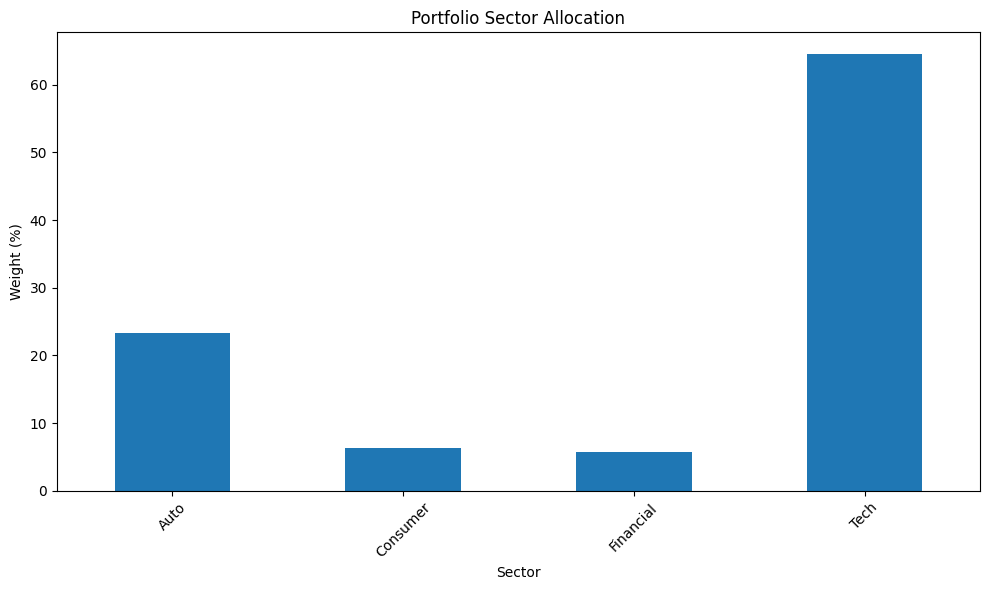

In [83]:
# Visualize sector allocation
sector_exposure['weight'].plot(kind='bar', figsize=(10, 6))
plt.title('Portfolio Sector Allocation')
plt.ylabel('Weight (%)')
plt.xlabel('Sector')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Summary: What We've Learned

DataFrames are the cornerstone of pandas. Let's recap:

### 1. Structure
- DataFrames are 2D tables (rows × columns)
- Each column is a Series
- Rows and columns both have indices

### 2. Creation
- From dict of lists: `pd.DataFrame({'col': [values]})`
- From list of dicts: `pd.DataFrame([{'col': value}])`
- From multiple Series: `pd.concat([s1, s2], axis=1)`

### 3. Inspection
- `.head()`, `.tail()`: Preview data
- `.info()`: Schema and types
- `.describe()`: Statistical summary
- `.shape`, `.columns`, `.index`: Basic properties

### 4. Indexing
- `df['col']`: Select column(s)
- `df.iloc[i]`: Select row(s) by position
- `df.loc[label]`: Select row(s) by label
- `df.loc[rows, cols]`: Select both dimensions

### 5. Filtering
- Boolean indexing: `df[df['col'] > value]`
- Multiple conditions: `df[(cond1) & (cond2)]`
- `.isin()`: Match multiple values

### 6. Operations
- Vectorized arithmetic: `df['col'] * 2`
- Aggregations: `.mean()`, `.sum()`, etc.
- Column-wise (default) or row-wise (`axis=1`)

### 7. Modification
- Add columns: `df['new'] = values`
- Rename: `.rename(columns={})`
- Drop: `.drop(columns=[])` or `.drop(index=[])`
- Functional: `.assign(new=lambda x: x['col'])`

### 8. Sorting
- By values: `.sort_values(col)`
- By index: `.sort_index()`
- Multiple columns: `.sort_values([col1, col2])`

### 9. GroupBy
- Split-apply-combine pattern
- `.groupby(col).agg(func)`
- Multiple aggregations: `.agg(['mean', 'sum'])`
- Custom functions: `.agg(lambda x: ...)`

### 10. Joining
- Stack: `pd.concat([df1, df2])`
- Merge: `pd.merge(df1, df2, on='key')`
- Join types: inner, left, right, outer

## Practice: Your Turn

Let's apply these concepts with time series data:

In [ ]:
# Generate sample price data
np.random.seed(42)
dates = pd.date_range('2024-01-01', periods=30, freq='D')

price_data = pd.DataFrame({
    'date': dates,
    'AAPL': 178 + np.random.randn(30).cumsum() * 2,
    'MSFT': 374 + np.random.randn(30).cumsum() * 3,
    'GOOGL': 140 + np.random.randn(30).cumsum() * 1.5
})

price_data = price_data.set_index('date')
price_data.head(10)

In [ ]:
# Calculate daily returns
returns = price_data.pct_change() * 100
print("Daily returns (%):")
returns.head(10)

In [ ]:
# Summary statistics
print("Return statistics (%):\n")
returns.describe()

In [ ]:
# Find best performing stock
total_returns = ((price_data.iloc[-1] / price_data.iloc[0]) - 1) * 100
print("Total returns over period (%):\n")
print(total_returns.sort_values(ascending=False))

In [ ]:
# Visualize normalized prices
normalized = price_data / price_data.iloc[0] * 100
normalized.plot(figsize=(12, 6))
plt.title('Normalized Stock Prices (Base 100)')
plt.ylabel('Indexed Price')
plt.xlabel('Date')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## What's Next?

You now have the foundational skills to work with pandas! But there's more to explore:

### Advanced Topics (Future Lessons)
- **Time series**: Resampling, rolling windows, date manipulation
- **Missing data**: Handling NaN values, interpolation
- **Multi-indexing**: Hierarchical indices for complex data
- **Performance**: Vectorization, apply functions, optimization
- **Data cleaning**: String operations, type conversion, validation
- **Pivot tables**: Reshaping data for analysis

### Resources
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [10 Minutes to Pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
- [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)